# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


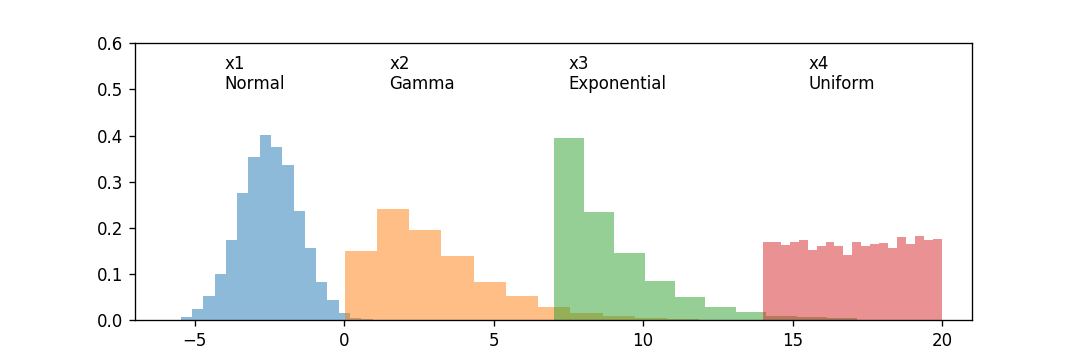

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


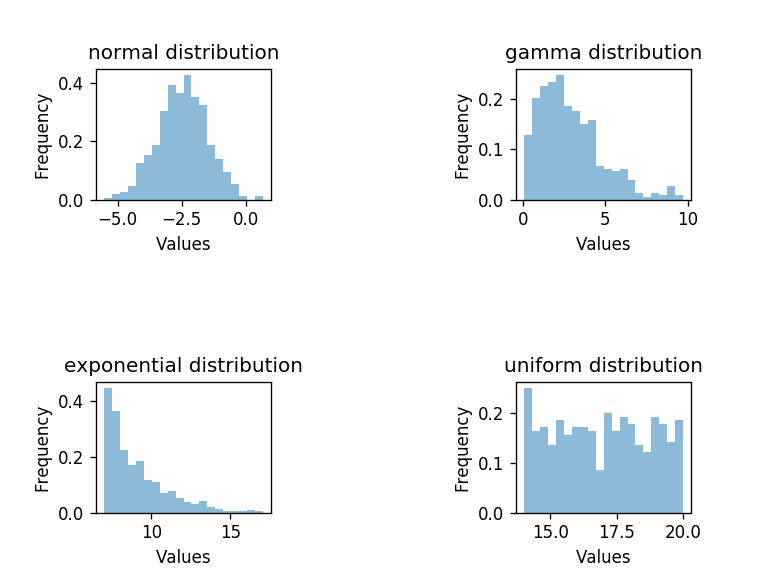

In [23]:
import pandas as pd
df=pd.DataFrame({'normal':x1,
                 'gamma':x2,
                 'exponential':x3,
                 'uniform':x4})
df=df.loc[100:1000,['exponential','gamma','normal','uniform']]
w=df['normal']
x=df['gamma']
y=df['exponential']
z=df['uniform']
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Cursor,Button
%matplotlib notebook
plt.figure()
gspec=gridspec.GridSpec(3,3)
a1=plt.subplot(gspec[0,0])
a2=plt.subplot(gspec[0,2])
a3=plt.subplot(gspec[2,0])
a4=plt.subplot(gspec[2,2])
def animate(i):
    a1.cla()
    a1.hist(w[:i],bins=20,normed=True,alpha=0.5)
    a1.set_title('normal distribution')
    a1.set_xlabel('Values')
    a1.set_ylabel('Frequency')
    a2.cla()
    a2.hist(x[:i],bins=20,normed=True,alpha=0.5)
    a2.set_title('gamma distribution')
    a2.set_xlabel('Values')
    a2.set_ylabel('Frequency')
    a3.cla()
    a3.hist(y[:i],bins=20,normed=True,alpha=0.5)
    a3.set_title('exponential distribution')
    a3.set_xlabel('Values')
    a3.set_ylabel('Frequency')
    a4.cla()
    a4.hist(z[:i],bins=20,normed=True,alpha=0.5)
    a4.set_title('uniform distribution')
    a4.set_xlabel('Values')
    a4.set_ylabel('Frequency') 
    
    
    
ani=FuncAnimation(plt.gcf(),animate,interval=10)
    